Defining pathways, importing packages, and getting reference genome sequences.

In [1]:
ref = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/ref/"
data = "C:/Users/Flora/Desktop/M2 Systèmes Complexes/Stage/Bioinfo/LTEE-clone-curated/"

In [2]:
from Bio import SeqIO
from Bio.SeqFeature import SeqFeature, FeatureLocation
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline
from math import floor

In [3]:
seq_K12 = SeqIO.read(ref+'K12_MG1655_H-NS_paper.fasta', 'fasta')

In [4]:
record = SeqIO.read(ref+'REL606.gbk', 'genbank') #loading ancestor reference file

# Creating a map of putative H-NS locations in REL606 using K12 data
(No need to re-run this part)

Step 1: for each phase (S/EE/ME) we open a file containing the coordinates of the H-NS segments. We create a list containing the coordinates of each segment. For each of these segments, we then get the corresponding sequence in the K12 genome and store it in a fasta file.

In [5]:
H_NS_S = open(ref+'H-NS_S_bindingregions.txt','r')
H_NS_S_readlines = H_NS_S.readlines()
H_NS_S_segments = []
for line in H_NS_S_readlines[1:]:
    H_NS_S_segments.append(line.split())

In [6]:
file_seq_K12_S = open('seq_H-NS_K12_S.fasta', 'w')
for segment in H_NS_S_segments:
    start = int(segment[0])
    end = int(segment[1])
    file_seq_K12_S.write('>' + '\t' + str(start) + '\t' + str(end) + '\n')
    file_seq_K12_S.write(str(seq_K12.seq[start:end]) + '\n')
file_seq_K12_S.close()

The idea is then to use this file as a blast entry to search for matches in the REL606 genome using NCBI's blast tool. (Not shown here, done on their website)

In [7]:
H_NS_EE = open(ref+'H-NS_EE_bindingregions.txt','r')
H_NS_EE_readlines = H_NS_EE.readlines()
H_NS_EE_segments = []
for line in H_NS_EE_readlines[1:]:
    H_NS_EE_segments.append(line.split())

In [8]:
seq_K12 = SeqIO.read(ref+'K12_MG1655_H-NS_paper.fasta', 'fasta')
file_seq_K12_EE = open('seq_H-NS_K12_EE.fasta', 'w')
for segment in H_NS_EE_segments:
    start = int(segment[0])
    end = int(segment[1])
    file_seq_K12_EE.write('>' + '\t' + str(start) + '\t' + str(end) + '\n')
    file_seq_K12_EE.write(str(seq_K12.seq[start:end]) + '\n')
file_seq_K12_EE.close()

In [9]:
H_NS_ME = open(ref+'H-NS_ME_bindingregions.txt','r')
H_NS_ME_readlines = H_NS_ME.readlines()
H_NS_ME_segments = []
for line in H_NS_ME_readlines[1:]:
    H_NS_ME_segments.append(line.split())

In [10]:
seq_K12 = SeqIO.read(ref+'K12_MG1655_H-NS_paper.fasta', 'fasta')
file_seq_K12_ME = open('seq_H-NS_K12_ME.fasta', 'w')
for segment in H_NS_ME_segments:
    start = int(segment[0])
    end = int(segment[1])
    file_seq_K12_ME.write('>' + '\t' + str(start) + '\t' + str(end) + '\n')
    file_seq_K12_ME.write(str(seq_K12.seq[start:end]) + '\n')
file_seq_K12_ME.close()

Step 2: we open the file generated with the blast (which contains, for each of the segments, the match found in REL606) and we get the coordinates of the matching segments in REL606. We save those coordinates in a file. 

In [11]:
ncbi_file_S = open(ref+'K12_to_REL606_phase_S.txt', 'r')
readlines_ncbi_S = ncbi_file_S.readlines()
file_fragments_REL606_S = open('fragments_REL606_S.txt', 'w')
for line in readlines_ncbi_S:
    if 'Range 1' in line:
        start = line.split()[2]
        end = line.split()[4]
        file_fragments_REL606_S.write(start + '\t' + end + '\n')
file_fragments_REL606_S.close()

In [12]:
ncbi_file_EE = open(ref+'K12_to_REL606_phase_EE.txt', 'r')
readlines_ncbi_EE = ncbi_file_EE.readlines()
file_fragments_REL606_EE = open('fragments_REL606_EE.txt', 'w')
for line in readlines_ncbi_EE:
    if 'Range 1' in line:
        start = line.split()[2]
        end = line.split()[4]
        file_fragments_REL606_EE.write(start + '\t' + end + '\n')
file_fragments_REL606_EE.close()

In [13]:
ncbi_file_ME = open(ref+'K12_to_REL606_phase_ME.txt', 'r')
readlines_ncbi_ME = ncbi_file_ME.readlines()
file_fragments_REL606_ME = open('fragments_REL606_ME.txt', 'w')
for line in readlines_ncbi_ME:
    if 'Range 1' in line:
        start = line.split()[2]
        end = line.split()[4]
        file_fragments_REL606_ME.write(start + '\t' + end + '\n')
file_fragments_REL606_ME.close()

Step 3: we want to combine the data from the different phases so we don't have to do a separate analysis everytime (I checked, the results aren't that different if you do that). 

We start by taking one phase as a reference: let's take phase S. We open the file listing those segments and we use them in the form of a list.  

In [14]:
H_NS_S = open('fragments_REL606_S.txt','r')
H_NS_S_readlines = H_NS_S.readlines()
H_NS_segments_S = []
for line in H_NS_S_readlines:
    H_NS_segments_S.append(line.split())

In [15]:
for segment in H_NS_segments_S:
    if int(segment[1]) - int(segment[0]) < 0:
        H_NS_segments_S.remove(segment)

In [16]:
H_NS_segments_ref = H_NS_segments_S

In [17]:
total_length = 0
for segment in H_NS_segments_ref:
    start = int(segment[0])
    end = int(segment[1])
    if end - start < 1000000:
        total_length += end - start
print(total_length)

790794


Now that we have something to start with, we are going to add the segments from phase EE that might not be present in phase S. 
For each segment of phase EE, we look at wether it overlaps with a segment from phase S. If so and there is a part of the segment present in phase EE but not phase S, we add that part to our ref. If the segment from phase EE doesn't overlap with anything, we add it. If the segment from phase EE is already included within a segment of phase S, we do nothing. 

We then do the same with the segments from phase ME. 

In [18]:
H_NS_EE = open('fragments_REL606_EE.txt','r')
H_NS_EE_readlines = H_NS_EE.readlines()
H_NS_segments_EE = []
for line in H_NS_EE_readlines:
    H_NS_segments_EE.append(line.split())

In [19]:
for segment in H_NS_segments_EE:
    if int(segment[1]) - int(segment[0]) < 0:
        H_NS_segments_EE.remove(segment)

In [20]:
for segment in H_NS_segments_EE:
    start_EE = int(segment[0])
    end_EE = int(segment[1])
    segment_found = False
    for segment_ref in H_NS_segments_ref:
        start_ref = int(segment_ref[0])
        end_ref = int(segment_ref[1])
        
        if start_ref <= start_EE and end_ref <= end_EE and start_EE <= end_ref:
            segment_found = True
            segment_ref[1] = end_EE
            break
        
        elif start_EE <= start_ref and end_EE <= end_ref and start_ref <= end_EE:
            segment_found = True
            segment_ref[0] = start_EE
            break
        
        elif start_ref <= start_EE and end_EE <= end_ref:
            segment_found = True
            break
        
        elif start_EE <= start_ref and end_ref <= end_EE:
            segment_found = True
            segment_ref[0] = start_EE
            segment_ref[1] = end_EE
            break
        
    if not segment_found:
        H_NS_segments_ref.append([start_EE, end_EE])

In [21]:
for segment in H_NS_segments_ref:
    if int(segment[1]) - int(segment[0]) < 0:
        H_NS_segments_ref.remove(segment)

In [22]:
total_length = 0
for segment in H_NS_segments_ref:
    start = int(segment[0])
    end = int(segment[1])
    if end - start < 1000000:
        total_length += end - start
print(total_length)

834744


In [23]:
H_NS_ME = open('fragments_REL606_ME.txt','r')
H_NS_ME_readlines = H_NS_ME.readlines()
H_NS_segments_ME = []
for line in H_NS_ME_readlines:
    H_NS_segments_ME.append(line.split())

In [24]:
for segment in H_NS_segments_ME:
    if int(segment[1]) - int(segment[0]) < 0:
        H_NS_segments_ME.remove(segment)

In [25]:
for segment in H_NS_segments_ME:
    start_ME = int(segment[0])
    end_ME = int(segment[1])
    segment_found = False
    for segment_ref in H_NS_segments_ref:
        start_ref = int(segment_ref[0])
        end_ref = int(segment_ref[1])
        
        if start_ref <= start_ME and end_ref <= end_ME and start_ME <= end_ref:
            segment_found = True
            H_NS_segments_ref.append([end_ref, end_ME])
            break
        
        elif start_ME <= start_ref and end_ME <= end_ref and start_ref <= end_ME:
            segment_found = True
            H_NS_segments_ref.append([start_ME, start_ref])
            break
        
        elif start_ref <= start_ME and end_ME <= end_ref:
            segment_found = True
            break
        
        elif start_ME <= start_ref and end_ref <= end_ME:
            segment_found = True
            H_NS_segments_ref.append([start_ME, start_ref])
            H_NS_segments_ref.append([end_ref, end_ME])
            break
        
    if not segment_found:
        H_NS_segments_ref.append([start_ME, end_ME])  

In [26]:
total_length = 0
for segment in H_NS_segments_ref:
    start = int(segment[0])
    end = int(segment[1])
    if end - start < 1000000:
        total_length += end - start
print(total_length)

850189


Now we have a reference list of putative segments on which, at some point, H-NS is found in REL606. 

# Using the generated map to see whether the AT bias is linked to the presence of H-NS

Now we retrieve the IS1 insertion positions. 

In [27]:
def extract_positions(IS_name):
    '''Generates a dictionary listing the position of insertions that occured at some point in at least
    one of the clones of one of the populations (only one occurrence per position, even if it occured
    in different populations).'''

    
    from os import listdir
    from os.path import isfile, join
    onlyfiles = [f for f in listdir(data) if isfile(join(data, f))] #listing all file names for the .gd files
    files = [] # creating a list that will first contain these names to be called, and later on open .gd files
    file_names = [] # list that will contain names as strings (kept as such for all the analysis)
    readlines_names = [] #list that will contain lists with the lines of each file (obtained via readlines())
    for i in onlyfiles: #fixing an error in the list of files (I don't know why it occurs) and filling the previously defined lists
        if len(i) < 30:
            files.append(i)
            file_names.append(i)
            readlines_names.append(i)
    
    
    for i in range(len(files)):
        files[i] = open(data+files[i],"r") #the list files becomes a list of open files
        readlines_names[i] = files[i].readlines() # the list readlines_names becomes a list of lists, with each list containing 
        #all the lines from one file
    
    
    insertion_positions = {} # Creating a dictionary to hold the positions of the insertions
    for i in range(len(file_names)): # for each file
        for line in readlines_names[i]: #we look at all the lines in the corresponding readlines_names entry
            line = line.split()
            if 'MOB' in line and IS_name in line: #if the line corresponds to a mutation linked to the IS
                insertion_positions[line[4]] = [line[4], line[6]] #we add an entry for this IS position to our dictionary
                # and save the orientation as well
                # /!\ this will erase the previous insertion if there was already an insertion at this position
    
    return insertion_positions
    

In [28]:
positions_IS1 = extract_positions('IS1')

We also get a dedicated function to be able to compute GC content.

In [29]:
def calc_gc_content(sequence):
    """Return the % G+C content in a passed sequence.
    Arguments:
        - sequence  - a Bio.Seq.Seq object.
    calc_gc_content(sequence)
    """
    d = {}
    for nt in ["A", "T", "G", "C"]:
        d[nt] = sequence.count(nt) + sequence.count(nt.lower())
    gc = d.get("G", 0) + d.get("C", 0)

    if gc == 0:
        return 0
    # print(gc*100.0/(d['A'] +d['T'] + gc))
    return gc * 1.0 / (d["A"] + d["T"] + gc)

We compute the GC content in 1000 bp windows on the whole 606 genome to be able to compute a mean. 

In [32]:
# calculating the GC content of all windows of x pb in the genome
gc_content_window = []
length = len(record.seq)
window = 1000
for i in range(floor(length/window)):
    start_pos = i*window
    end_pos = (i+1)*window
    gc_content = calc_gc_content(record[start_pos:end_pos].seq)
    gc_content_window.append(gc_content)

We use that mean to discriminate between AT-rich windows and others (AT-rich windows have a GC content below the general average). 

In [33]:
# calculating the GC content of all windows of x pb in the genome
AT_rich_window = []
mean_gc_genome = sum(gc_content_window)/len(gc_content_window)
length = len(record.seq)
window = 1000
for i in range(floor(length/window)):
    start_pos = i*window
    end_pos = (i+1)*window
    gc_content = calc_gc_content(record[start_pos:end_pos].seq)
    if gc_content < mean_gc_genome:
        AT_rich_window.append([start_pos, end_pos])

In [34]:
len(AT_rich_window)

1930

We look at which windows correspond to an H-NS binding region and which don't (we give ourselves 10 pb of leeway):

In [35]:
H_NS_window = 0
non_H_NS_window = 0
for window in AT_rich_window:
    start_window = window[0]
    end_window = window[1]
    window_found = False
    for segment in H_NS_segments_ref:
        start_segment = int(segment[0])
        end_segment = int(segment[1])
        if start_window > start_segment-10 and end_window < end_segment+10:
            window_found = True
            window.append('H_NS')
            H_NS_window += 1
            break
    if not window_found: 
        window.append('non_H_NS')
        non_H_NS_window += 1

In [36]:
print(H_NS_window)
print(non_H_NS_window)

411
1519


We then look at our IS1 insertions into AT-rich regions: is there an enrichment in H-NS binding region compared to the general distribution for AT-rich windows?

In [37]:
IS1_H_NS = 0
IS1_non_H_NS = 0
for position in positions_IS1.keys():
    position = int(position)
    for window in AT_rich_window:
        start = int(window[0])
        end = int(window[1])
        status = window[2]
        if position >= start and position <= end:
            if status == 'H_NS':
                IS1_H_NS += 1
            if status == 'non_H_NS':
                IS1_non_H_NS += 1

In [38]:
H_NS_window/(H_NS_window+non_H_NS_window)

0.21295336787564767

In [39]:
IS1_H_NS/(IS1_H_NS+IS1_non_H_NS)

0.3142857142857143

In [40]:
oddsratio, pvalue = stats.fisher_exact([[H_NS_window, non_H_NS_window],
                                      [IS1_H_NS, IS1_non_H_NS]])
pvalue

NameError: name 'stats' is not defined

Now let's check whether we still see the AT shift for IS1 insertions that insert into non H-NS binding regions (we'll compare it to all non-H-NS binding regions in the genome). 

In [41]:
# calculating the GC content of all windows of x pb in the genome
non_H_NS_windows = []
length = len(record.seq)
window = 1000
for i in range(floor(length/window)):
    start_window = i*window
    end_window = (i+1)*window
    window_found = False
    for segment in H_NS_segments_ref:
        start_segment = int(segment[0])
        end_segment = int(segment[1])
        if start_window > start_segment-10 and end_window < end_segment+10:
            window_found = True
            break
    if not window_found: 
        non_H_NS_windows.append([start_window, end_window]) 

In [42]:
len(non_H_NS_windows)

4216

In [43]:
gc_content_IS1 = []
for position in positions_IS1.keys():
    position = int(position)
    for window in non_H_NS_windows:
        start = int(window[0])
        end = int(window[1])
        if position >= start and position <= end:
            gc_content = calc_gc_content(record[start:end].seq)
            gc_content_IS1.append(gc_content)
            break

In [44]:
gc_content_non_H_NS = []
for window in non_H_NS_windows:
    start = int(window[0])
    end = int(window[1])
    gc_content = calc_gc_content(record[start:end].seq)
    gc_content_non_H_NS.append(gc_content)

In [45]:
len(gc_content_IS1)

62

In [46]:
len(gc_content_non_H_NS)

4216

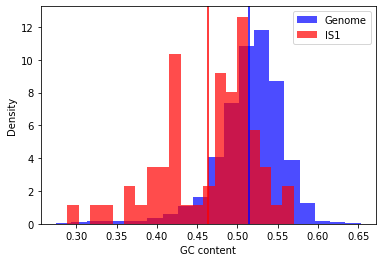

In [47]:
plt.hist(gc_content_non_H_NS, density=True, bins=20, color = 'blue', alpha = 0.7, label = 'Genome')  # density=False would make counts
plt.hist(gc_content_IS1, density=True, bins=20, color = 'red', alpha = 0.7, label = 'IS1')  # density=False would make counts

plt.axvline(sum(gc_content_non_H_NS)/len(gc_content_non_H_NS), color='blue', linewidth=1.5)
plt.axvline(sum(gc_content_IS1)/len(gc_content_IS1), color='red', linewidth=1.5)

plt.ylabel('Density')
plt.xlabel('GC content')
plt.legend()

plt.savefig('GC_content_IS1_no_H_NS.png',dpi=400)

So, still a huge bias. So no, H-NS is far from being the one thing explaining IS1 AT-rich bias. 

Same thing but with another criteria for AT-rich windows: define it using a histogram of H_NS windows GC content. 

In [48]:
# calculating the GC content of all windows of x pb in the genome
H_NS_windows = []
non_H_NS_windows = []
length = len(record.seq)
window = 1000
for i in range(floor(length/window)):
    start_window = i*window
    end_window = (i+1)*window
    window_found = False
    for segment in H_NS_segments_ref:
        start_segment = int(segment[0])
        end_segment = int(segment[1])
        if start_window > start_segment-10 and end_window < end_segment+10:
            window_found = True
            H_NS_windows.append([start_window, end_window]) 
            break
    if not window_found: 
        non_H_NS_windows.append([start_window, end_window]) 

In [49]:
gc_content_H_NS_windows = []
for window in H_NS_windows:
    start = window[0]
    end = window[1]
    gc_content = calc_gc_content(record[start:end].seq)
    gc_content_H_NS_windows.append(gc_content)

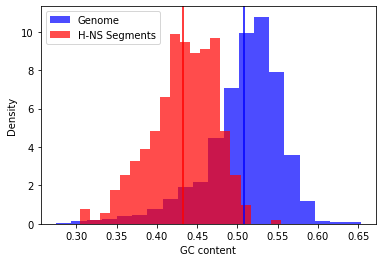

In [50]:
plt.hist(gc_content_window, density=True, bins=20, color = 'blue', alpha = 0.7, label = 'Genome')  # density=False would make counts
plt.hist(gc_content_H_NS_windows, density=True, bins=20, color = 'red', alpha = 0.7, label = 'H-NS Segments')  # density=False would make counts

plt.axvline(sum(gc_content_window)/len(gc_content_window), color='blue', linewidth=1.5)
plt.axvline(sum(gc_content_H_NS_windows)/len(gc_content_H_NS_windows), color='red', linewidth=1.5)

plt.ylabel('Density')
plt.xlabel('GC content')
plt.legend()

Let's set the cutoff point at 0.5.

In [51]:
# calculating the GC content of all windows of x pb in the genome
AT_rich_window = []
mean_gc_genome = sum(gc_content_window)/len(gc_content_window)
length = len(record.seq)
window = 1000
for i in range(floor(length/window)):
    start_pos = i*window
    end_pos = (i+1)*window
    gc_content = calc_gc_content(record[start_pos:end_pos].seq)
    if gc_content < 0.5:
        AT_rich_window.append([start_pos, end_pos])

In [52]:
len(AT_rich_window)

1593

In [53]:
H_NS_window = 0
non_H_NS_window = 0
for window in AT_rich_window:
    start_window = window[0]
    end_window = window[1]
    window_found = False
    for segment in H_NS_segments_ref:
        start_segment = int(segment[0])
        end_segment = int(segment[1])
        if start_window > start_segment-10 and end_window < end_segment+10:
            window_found = True
            window.append('H_NS')
            H_NS_window += 1
            break
    if not window_found: 
        window.append('non_H_NS')
        non_H_NS_window += 1

In [54]:
print(H_NS_window)
print(non_H_NS_window)

403
1190


In [55]:
IS1_H_NS = 0
IS1_non_H_NS = 0
for position in positions_IS1.keys():
    position = int(position)
    for window in AT_rich_window:
        start = int(window[0])
        end = int(window[1])
        status = window[2]
        if position >= start and position <= end:
            if status == 'H_NS':
                IS1_H_NS += 1
            if status == 'non_H_NS':
                IS1_non_H_NS += 1

In [56]:
H_NS_window/(H_NS_window+non_H_NS_window)

0.2529817953546767

In [57]:
IS1_H_NS/(IS1_H_NS+IS1_non_H_NS)

0.3548387096774194

In [58]:
print(IS1_H_NS)
print(IS1_non_H_NS)

22
40


In [59]:
print(H_NS_window)
print(non_H_NS_window)

403
1190


In [60]:
import scipy.stats as stats

In [61]:
oddsratio, pvalue = stats.fisher_exact([[22, 40],
                                      [403, 1190]])
pvalue

0.07634317153905203

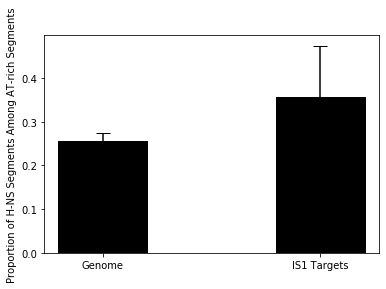

In [62]:
# width of the bars
barWidth = 0.04
 
# Choose the height of the blue bars
bars1 = [H_NS_window/(H_NS_window+non_H_NS_window), IS1_H_NS/(IS1_H_NS+IS1_non_H_NS)]

# Choose the height of the error bars (bars1)
yer1 = [0.0214, 0.1191]
  
# The x position of bars
r1 = [0.1, 0.2]
 
# Create blue bars
plt.bar(r1, bars1, width = barWidth, color = 'black', yerr=yer1, lw=3, edgecolor = 'black', capsize=7)

# general layout
plt.xticks([0.1, 0.2], ['Genome', 'IS1 Targets'])
plt.ylabel('Proportion of H-NS Segments Among AT-rich Segments')


plt.savefig('H_NS_test.png')
# Show graphic

# Map of putative H-NS binding regions in REL606

In [ ]:
%matplotlib inline
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['font.size'] = 20

In [ ]:
Lg=4729599

def norm_affine(v,vmin,vmax,rmin,rmax):
    #affine transformation of a signal varying between vmin and vmax such that it ends varying between rmin and rmax
    return rmin+(v-vmin)*(rmax-rmin)/(vmax-vmin)

def genom2polarData(fi,rmin=1,rmax=1.5,L=Lg):
    wlines=[line for line in open(fi).readlines() if line[0]!='#']

    #thetas
    positions=[float(line.split()[0]) for line in wlines]
    thetas=[p/L*2*np.pi for p in positions]

    #rs
    values=[float(line.split()[1]) for line in wlines]
    vmin,vmax=np.min(values),np.max(values)    
    rs=[norm_affine(v,vmin=vmin,vmax=vmax,rmin=rmin,rmax=rmax) for v in values]    
    
    return thetas,rs


def add_genomData(fi,rmin=1,rmax=1.5,L=Lg,color='C0',label=''):
    
    #baseline
    thetas=np.arange(0,2*np.pi,0.01)
    rs=np.array([rmin for t in thetas])
    plt.plot(thetas,rs,lw=2,color=color)
    
    #data
    thetas,rs=genom2polarData(fi,rmin=rmin,rmax=rmax,L=Lg)
    plt.plot(thetas,rs,lw=2,color=color,label=label) 

In [ ]:
H_NS_data_list = [0 for j in range(floor(Lg/100))] #we create a list to hold the number of ISs at each position
#(we divide the genome into chunks of 100 000 pb)

for position in range(len(H_NS_data_list)):
    position_genome_start = position*100
    position_genome_end = (position + 1)*100
    for segment in H_NS_segments_ref:
        start = int(segment[0])
        end = int(segment[1])
        if start <= position_genome_end and position_genome_end <= end:
            H_NS_data_list[position] = 1
            break


In [ ]:
H_NS_S = open('fragments_REL606_S.txt','r')
H_NS_S_readlines = H_NS_S.readlines()
H_NS_segments_S = []
for line in H_NS_S_readlines:
    H_NS_segments_S.append(line.split())

    for segment in H_NS_segments_S:
    if int(segment[1]) - int(segment[0]) < 0:
        H_NS_segments_S.remove(segment)

In [ ]:
H_NS_S_data_list = [0 for j in range(floor(Lg/100))] #we create a list to hold the number of ISs at each position
#(we divide the genome into chunks of 100 000 pb)

for position in range(len(H_NS_S_data_list)):
    position_genome_start = position*100
    position_genome_end = (position + 1)*100
    for segment in H_NS_segments_S:
        start = int(segment[0])
        end = int(segment[1])
        if start <= position_genome_end and position_genome_end <= end:
            H_NS_S_data_list[position] = 1
            break


In [ ]:
H_NS_EE_data_list = [0 for j in range(floor(Lg/100))] #we create a list to hold the number of ISs at each position
#(we divide the genome into chunks of 100 000 pb)

for position in range(len(H_NS_EE_data_list)):
    position_genome_start = position*100
    position_genome_end = (position + 1)*100
    for segment in H_NS_segments_EE:
        start = int(segment[0])
        end = int(segment[1])
        if start <= position_genome_end and position_genome_end <= end:
            H_NS_EE_data_list[position] = 1
            break


In [ ]:
H_NS_ME_data_list = [0 for j in range(floor(Lg/100))] #we create a list to hold the number of ISs at each position
#(we divide the genome into chunks of 100 000 pb)

for position in range(len(H_NS_ME_data_list)):
    position_genome_start = position*100
    position_genome_end = (position + 1)*100
    for segment in H_NS_segments_ME:
        start = int(segment[0])
        end = int(segment[1])
        if start <= position_genome_end and position_genome_end <= end:
            H_NS_ME_data_list[position] = 1
            break


In [ ]:
print(H_NS_S_data_list.count(1))
print(H_NS_EE_data_list.count(1))
print(H_NS_ME_data_list.count(1))
print(H_NS_data_list.count(1))

In [ ]:
file_H_NS_representation = open('H_NS_segments_representation.txt', 'w')       
for j in range(len(H_NS_data_list)):
    pb_position = 100*j
    file_H_NS_representation.write(str(pb_position) + "\t" + "0" + '\n')
    file_H_NS_representation.write(str(pb_position + 1) + "\t" + str(H_NS_data_list[j]) + '\n')
    file_H_NS_representation.write(str(pb_position+99) + "\t" + str(H_NS_data_list[j]) + '\n')
file_H_NS_representation.write("4700000" + "\t" + "0" + '\n')
file_H_NS_representation.close()

In [ ]:
file_H_NS_S_representation = open('H_NS_segments_S_representation.txt', 'w')       
for j in range(len(H_NS_S_data_list)):
    pb_position = 100*j
    file_H_NS_S_representation.write(str(pb_position) + "\t" + "0" + '\n')
    file_H_NS_S_representation.write(str(pb_position + 1) + "\t" + str(H_NS_S_data_list[j]) + '\n')
    file_H_NS_S_representation.write(str(pb_position+99) + "\t" + str(H_NS_S_data_list[j]) + '\n')
file_H_NS_S_representation.write("4700000" + "\t" + "0" + '\n')
file_H_NS_S_representation.close()

In [ ]:
file_H_NS_EE_representation = open('H_NS_segments_EE_representation.txt', 'w')       
for j in range(len(H_NS_EE_data_list)):
    pb_position = 100*j
    file_H_NS_EE_representation.write(str(pb_position) + "\t" + "0" + '\n')
    file_H_NS_EE_representation.write(str(pb_position + 1) + "\t" + str(H_NS_EE_data_list[j]) + '\n')
    file_H_NS_EE_representation.write(str(pb_position+99) + "\t" + str(H_NS_EE_data_list[j]) + '\n')
file_H_NS_EE_representation.write("4700000" + "\t" + "0" + '\n')
file_H_NS_EE_representation.close()

In [ ]:
file_H_NS_ME_representation = open('H_NS_segments_ME_representation.txt', 'w')       
for j in range(len(H_NS_ME_data_list)):
    pb_position = 100*j
    file_H_NS_ME_representation.write(str(pb_position) + "\t" + "0" + '\n')
    file_H_NS_ME_representation.write(str(pb_position + 1) + "\t" + str(H_NS_ME_data_list[j]) + '\n')
    file_H_NS_ME_representation.write(str(pb_position+99) + "\t" + str(H_NS_ME_data_list[j]) + '\n')
file_H_NS_ME_representation.write("4700000" + "\t" + "0" + '\n')
file_H_NS_ME_representation.close()

In [ ]:
ax = plt.subplot(111,polar=True)

add_genomData('H_NS_segments_S_representation.txt',rmin=1.5,rmax=1.6,color = "green", label = 'Phase S') #rmin: position of the baseline
add_genomData('H_NS_segments_EE_representation.txt',rmin=2,rmax=2.1,color = "blue", label = 'Phase EE') #rmin: position of the baseline
add_genomData('H_NS_segments_ME_representation.txt',rmin=2.5,rmax=2.6,color = "red", label = 'Phase ME') #rmin: position of the baseline
add_genomData('H_NS_segments_representation.txt',rmin=3,rmax=3.1,color = "black", label = 'Merged') #rmin: position of the baseline


ax.set_theta_direction(-1)
plt.rgrids([]); plt.thetagrids([]); plt.axis('off');
ax.set_theta_offset(np.pi/2)
plt.legend(loc=(1.05,0))

plt.title('H-NS segments')